In [2]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision.datasets as datasets
from torch.autograd import Variable
import torchvision
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.7,), (0.7,)),])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
train_size = int(0.5 * len(mnist_train))
val_size = len(mnist_train) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(mnist_train, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)

In [5]:
from tiny_model_we import Net

alphas1
alphas2
Train acc 0.14058333333333334
Val acc 0.851313164893617
Train acc 0.22316666666666668
Val acc 0.9171376329787234
Train acc 0.2325625
Val acc 0.9247839095744681
Train acc 0.236125
Val acc 0.945561835106383
Train acc 0.23804166666666668
Val acc 0.9447307180851063
Train acc 0.23904166666666668
Val acc 0.9513796542553191
Train acc 0.239875
Val acc 0.9516289893617021
Train acc 0.24029166666666665
Val acc 0.9485538563829787
Train acc 0.24133333333333334
Val acc 0.9594414893617021
Train acc 0.24152083333333332
Val acc 0.9546210106382979
Train acc 0.24141666666666667
Val acc 0.9576130319148937
Train acc 0.24227083333333332
Val acc 0.960438829787234
Train acc 0.24247916666666666
Val acc 0.9630152925531915
Train acc 0.2416875
Val acc 0.9597739361702128
Train acc 0.2436875
Val acc 0.9617686170212766
Train acc 0.24270833333333333
Val acc 0.9658410904255319
Train acc 0.2435
Val acc 0.9619348404255319
Train acc 0.24272916666666666
Val acc 0.9612699468085106
Train acc 0.244
Val acc 0.

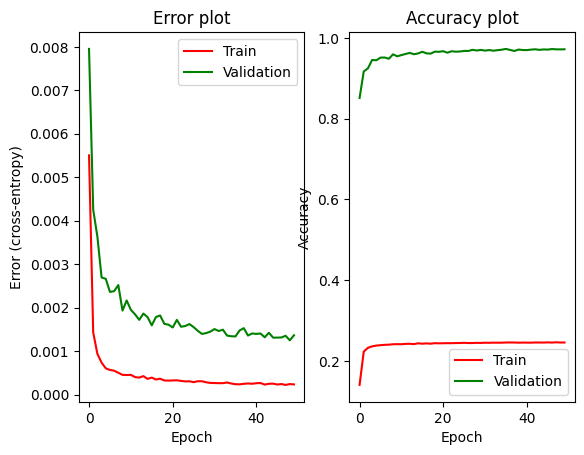

Test accuracy : 0.977


In [6]:
param_list = []
model = Net(4,4,20,'darts').cuda()
for n,p in model.named_parameters():
    if "alpha" not in n:
        param_list.append(p)
    else:
        print(n)

optimizer = torch.optim.SGD(param_list,lr=0.1)
optimizer_arch = torch.optim.Adam([model.alphas1,model.alphas2],lr=0.001,weight_decay = 1e-3)
criterion = nn.CrossEntropyLoss()
batch_size = 64
train_errors = []
train_acc = []
val_errors = []
val_acc = []
n_train = len(train_loader)*batch_size
n_val = len(val_loader)*batch_size
tau = torch.Tensor([0.1])
for i in range(50):
  total_loss = 0
  total_acc = 0  
  c = 0
  for (images,labels), (images_val,labels_val) in zip(train_loader,val_loader):
    images = images.cuda()
    labels = labels.cuda()
    images_val = images_val.cuda()
    labels_val = labels_val.cuda()    
    optimizer.zero_grad()
    output = model(images,tau)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    optimizer_arch.zero_grad()
    output_val = model(images_val,tau)
    loss_val = criterion(output_val,labels_val)
    loss_val.backward()
    optimizer_arch.step()    
    total_loss+=loss.item()
    total_acc+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0    
    c+=1
    
  
  #validation
  
  total_loss_val = 0
  total_acc_val = 0
  c = 0
  for images,labels in val_loader:
    images = images.cuda()
    labels = labels.cuda()
    output = model(images,tau)
    loss = criterion(output,labels)
    
    total_loss_val +=loss.item()
    total_acc_val +=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0
    c+=1
  train_errors.append(total_loss/n_train)
  train_acc.append(total_acc/n_train)
  val_errors.append(total_loss_val/n_val)
  val_acc.append(total_acc_val/n_val)
  print("Train acc",train_acc[-1])
  print("Val acc",val_acc[-1])  
print("Training complete")

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(train_errors, 'r',label="Train")
ax[0].plot(val_errors, 'g', label="Validation")
ax[0].set_title("Error plot")
ax[0].set_ylabel("Error (cross-entropy)")
ax[0].set_xlabel("Epoch")
ax[0].legend()
ax[1].plot(train_acc, 'r',label="Train")
ax[1].plot(val_acc, 'g', label="Validation")
ax[1].set_title("Accuracy plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()
plt.show()

total_acc = 0
for images,labels in test_loader:
  images = images.cuda()
  labels = labels.cuda()
  output = model(images,tau)
  total_acc+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0

print("Test accuracy :",total_acc/len(test_loader.dataset))

In [8]:
print(torch.argmax(torch.nn.functional.softmax(model.alphas1,dim=-1)))
print(torch.argmax(torch.nn.functional.softmax(model.alphas2,dim=-1)))

tensor(6, device='cuda:0')
tensor(6, device='cuda:0')


In [9]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision.datasets as datasets
from torch.autograd import Variable
import torchvision
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.7,), (0.7,)),])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(mnist_train, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)

Train acc 0.9019166666666667
Val acc 0.9553690159574468
Train acc 0.9614166666666667
Val acc 0.96484375
Train acc 0.9674583333333333
Val acc 0.9600232712765957
Train acc 0.970625
Val acc 0.9681682180851063
Train acc 0.973375
Val acc 0.9661735372340425
Train acc 0.9747291666666666
Val acc 0.9720744680851063
Train acc 0.9751666666666666
Val acc 0.9751496010638298
Train acc 0.9760416666666667
Val acc 0.972406914893617
Train acc 0.9770416666666667
Val acc 0.9729886968085106
Train acc 0.9782083333333333
Val acc 0.9712433510638298
Train acc 0.978125
Val acc 0.97265625
Train acc 0.97925
Val acc 0.9727393617021277
Train acc 0.9796875
Val acc 0.971908244680851
Train acc 0.9800208333333333
Val acc 0.9728224734042553
Train acc 0.9802708333333333
Val acc 0.973154920212766
Train acc 0.9804791666666667
Val acc 0.9748171542553191
Train acc 0.9810833333333333
Val acc 0.9717420212765957
Train acc 0.981
Val acc 0.9744847074468085
Train acc 0.9811875
Val acc 0.976811835106383
Train acc 0.9820208333333333

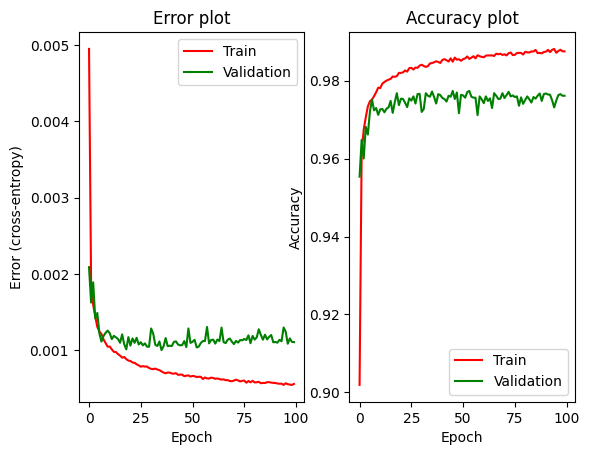

Test accuracy : 0.9804


In [10]:
dict_test_accs = {}
idx1 = 6
idx2 = 6
from tiny_model import NetDiscrete
model = NetDiscrete(4,4,20,idx1,idx2).cuda()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
criterion = nn.CrossEntropyLoss()
batch_size = 64
train_errors = []
train_acc = []
val_errors = []
val_acc = []
n_train = len(train_loader)*batch_size
n_val = len(val_loader)*batch_size
for i in range(100):
    total_loss = 0
    total_acc = 0
    c = 0
    for (images,labels) in train_loader:
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
        total_acc+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0    
        c+=1
        #validation
        total_loss_val = 0
        total_acc_val = 0
        c = 0
    for images,labels in val_loader:
        images = images.cuda()
        labels = labels.cuda()
        output = model(images)
        loss = criterion(output,labels)
        total_loss_val +=loss.item()
        total_acc_val +=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0
        c+=1
    train_errors.append(total_loss/n_train)
    train_acc.append(total_acc/n_train)
    val_errors.append(total_loss_val/n_val)
    val_acc.append(total_acc_val/n_val)
    print("Train acc",train_acc[-1])
    print("Val acc",val_acc[-1])
print("Training complete")
print(idx1,idx2)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(train_errors, 'r',label="Train")
ax[0].plot(val_errors, 'g', label="Validation")
ax[0].set_title("Error plot")
ax[0].set_ylabel("Error (cross-entropy)")
ax[0].set_xlabel("Epoch")
ax[0].legend()
ax[1].plot(train_acc, 'r',label="Train")
ax[1].plot(val_acc, 'g', label="Validation")
ax[1].set_title("Accuracy plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()
plt.show()
total_acc = 0
for images,labels in test_loader:
    images = images.cuda()
    labels = labels.cuda()
    output = model(images)
    total_acc+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0
print("Test accuracy :",total_acc/len(test_loader.dataset))
test_acc = total_acc/len(test_loader.dataset)
dict_test_accs[(idx1,idx2)]= test_acc